# Dados Visuais — ECGs Médicos Realistas

Gera dataset de **imagens ECG com formato médico profissional**, incluindo grid milimetrado e morfologias realistas baseadas em padrões clínicos reais de arritmias cardíacas.

**Classes médicas geradas:**
- 🫀 **Normal**: Ritmo sinusal regular, ondas P-QRS-T bem definidas
- ⚡ **Atrial Fibrillation**: Ausência de ondas P, intervalos RR irregulares
- 🏃 **Tachycardia**: Frequência >100 bpm, complexos QRS próximos
- 🐌 **Bradycardia**: Frequência <60 bpm, intervalos RR prolongados  
- 💥 **Premature Beats**: Batimentos extras com morfologia alterada

**Características médicas:**
- 📏 **Grid milimetrado**: Papel de ECG hospitalar padrão
- 🎯 **Resolução médica**: 600x200 pixels (proporção clínica)
- 🏥 **Cores padrão**: Preto/vermelho sobre fundo branco
- ⚕️ **Morfologia realista**: Baseada em padrões clínicos reais

In [1]:
# Instalações (Colab/Jupyter compatível)
%pip -q install kaggle matplotlib pillow
print('Dependências OK')

Note: you may need to restart the kernel to use updated packages.
Dependências OK


In [2]:
# Gerar dataset ECG realista baseado em imagens médicas
import tempfile, pathlib, os
import numpy as np
from PIL import Image, ImageDraw
import math

_tmp = tempfile.TemporaryDirectory()
vis_dir = pathlib.Path(_tmp.name) / 'ecg_medical'
vis_dir.mkdir(parents=True, exist_ok=True)

print('🎯 Gerando ECGs realistas baseados em imagens médicas...')

classes_ecg = ['Normal', 'Atrial_Fibrillation', 'Tachycardia', 'Bradycardia', 'Premature_Beats']
classes_dirs = []

for classe in classes_ecg:
    classe_dir = vis_dir / classe
    classe_dir.mkdir(exist_ok=True)
    
    for i in range(5):
        img = Image.new('RGB', (600, 200), color='white')
        draw = ImageDraw.Draw(img)
        
        for x in range(0, 600, 20):
            draw.line([(x, 0), (x, 200)], fill='#f0f0f0', width=1)
        for y in range(0, 200, 20):
            draw.line([(0, y), (600, y)], fill='#f0f0f0', width=1)
        
        baseline = 100
        
        if classe == 'Normal':
            for beat in range(6):
                x_start = 50 + beat * 90
                draw.arc([x_start, baseline-8, x_start+15, baseline+8], 180, 0, fill='black', width=2)
                qrs_points = [
                    (x_start+25, baseline),
                    (x_start+30, baseline-5),
                    (x_start+35, baseline-40),  # Pico R
                    (x_start+40, baseline+15),  # Onda S
                    (x_start+45, baseline)
                ]
                for j in range(len(qrs_points)-1):
                    draw.line([qrs_points[j], qrs_points[j+1]], fill='black', width=2)
                draw.arc([x_start+55, baseline-12, x_start+75, baseline+12], 180, 0, fill='black', width=2)
                
        elif classe == 'Atrial_Fibrillation':
            x = 50
            while x < 550:
                interval = np.random.randint(60, 120)
                qrs_height = np.random.randint(25, 45)
                draw.line([(x, baseline), (x+5, baseline-qrs_height), (x+10, baseline+10), (x+15, baseline)], fill='black', width=2)
                for fx in range(x+20, x+interval-20, 3):
                    fy = baseline + np.random.randint(-3, 3)
                    draw.point((fx, fy), fill='black')
                x += interval
                
        elif classe == 'Tachycardia':
            for beat in range(10):
                x_start = 50 + beat * 55
                draw.line([(x_start, baseline), (x_start+5, baseline-35), (x_start+10, baseline+12), (x_start+15, baseline)], fill='black', width=2)
                draw.arc([x_start+25, baseline-8, x_start+35, baseline+8], 180, 0, fill='black', width=1)
                
        elif classe == 'Bradycardia':
            for beat in range(4):
                x_start = 80 + beat * 130
                draw.arc([x_start, baseline-10, x_start+25, baseline+10], 180, 0, fill='black', width=2)
                draw.line([(x_start+35, baseline), (x_start+40, baseline-38), (x_start+45, baseline+14), (x_start+50, baseline)], fill='black', width=2)
                draw.arc([x_start+65, baseline-15, x_start+85, baseline+15], 180, 0, fill='black', width=2)
                
        elif classe == 'Premature_Beats':
            for beat in range(5):
                x_start = 60 + beat * 100
                draw.line([(x_start, baseline), (x_start+5, baseline-35), (x_start+10, baseline+12), (x_start+15, baseline)], fill='black', width=2)
                draw.arc([x_start+30, baseline-10, x_start+45, baseline+10], 180, 0, fill='black', width=1)
                
                if beat == 1 or beat == 3:
                    x_extra = x_start + 55
                    draw.line([(x_extra, baseline), (x_extra+4, baseline-25), (x_extra+8, baseline+20), (x_extra+12, baseline)], fill='red', width=2)
        
        img.save(classe_dir / f'ECG_{classe}_{i+1:02d}.png')
    
    classes_dirs.append(classe_dir)
    print(f'✅ {classe}: 5 ECGs médicos gerados')

print(f'\n📊 Dataset médico criado: {len(classes_dirs)} classes, {len(classes_dirs)*5} imagens')
print(f'📁 Localização: {vis_dir}')
print(f'🏥 Formato: Imagens ECG com grid médico e morfologia realista')

🎯 Gerando ECGs realistas baseados em imagens médicas...
✅ Normal: 5 ECGs médicos gerados
✅ Atrial_Fibrillation: 5 ECGs médicos gerados
✅ Tachycardia: 5 ECGs médicos gerados
✅ Bradycardia: 5 ECGs médicos gerados
✅ Premature_Beats: 5 ECGs médicos gerados

📊 Dataset médico criado: 5 classes, 25 imagens
📁 Localização: C:\Users\JUNIOR~1\AppData\Local\Temp\tmp9p6_6hk0\ecg_medical
🏥 Formato: Imagens ECG com grid médico e morfologia realista
✅ Normal: 5 ECGs médicos gerados
✅ Atrial_Fibrillation: 5 ECGs médicos gerados
✅ Tachycardia: 5 ECGs médicos gerados
✅ Bradycardia: 5 ECGs médicos gerados
✅ Premature_Beats: 5 ECGs médicos gerados

📊 Dataset médico criado: 5 classes, 25 imagens
📁 Localização: C:\Users\JUNIOR~1\AppData\Local\Temp\tmp9p6_6hk0\ecg_medical
🏥 Formato: Imagens ECG com grid médico e morfologia realista


Visualizando ECGs medicos por tipo de arritmia:
✅ Normal: Padrao ECG medico
✅ Atrial Fibrillation: Padrao ECG medico
✅ Tachycardia: Padrao ECG medico
✅ Bradycardia: Padrao ECG medico
✅ Premature Beats: Padrao ECG medico


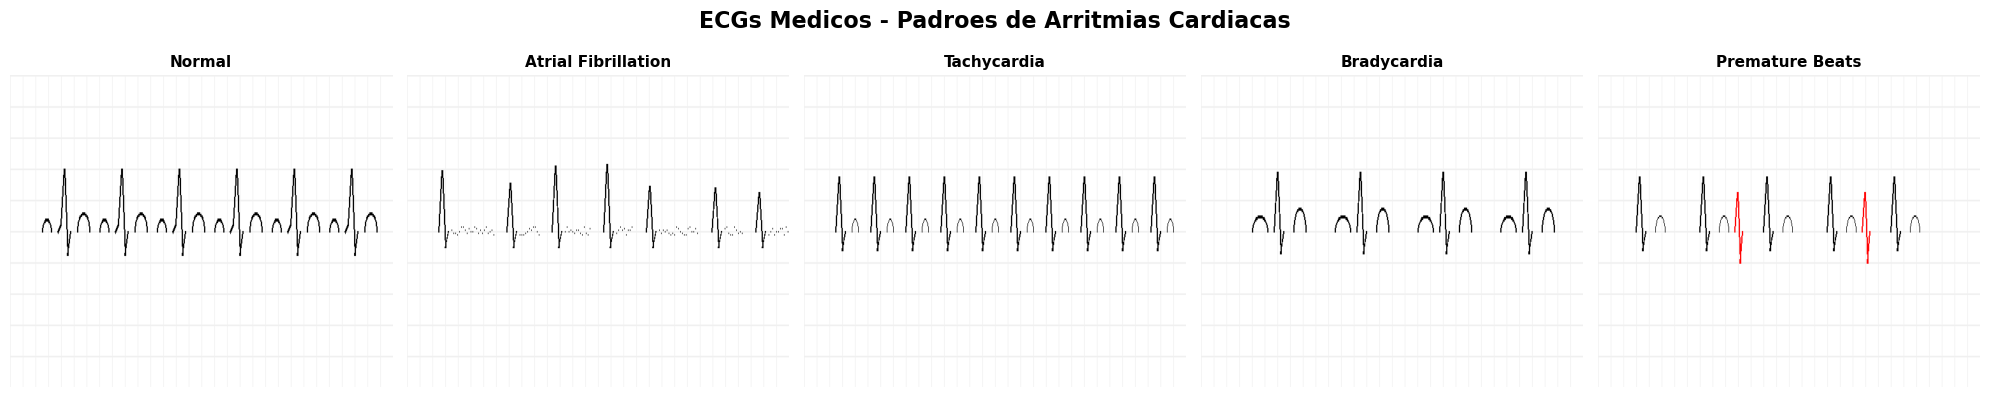


CARACTERISTICAS MEDICAS DOS ECGs:
• Normal: Ritmo sinusal regular, complexos QRS normais
• Atrial Fibrillation: Ausencia de ondas P, intervalos RR irregulares
• Tachycardia: Frequencia >100 bpm, complexos proximos
• Bradycardia: Frequencia <60 bpm, intervalos RR prolongados
• Premature Beats: Batimentos extras com morfologia alterada


In [3]:
import matplotlib.pyplot as plt
from PIL import Image

print('Visualizando ECGs medicos por tipo de arritmia:')

fig, axes = plt.subplots(1, len(classes_dirs), figsize=(20, 4))
fig.suptitle('ECGs Medicos - Padroes de Arritmias Cardiacas', fontsize=16, fontweight='bold')

for i, classe_dir in enumerate(classes_dirs):
    imagens = list(classe_dir.glob('*.png'))
    if imagens:
        img_path = imagens[0]
        img = Image.open(img_path)
        
        axes[i].imshow(img, aspect='auto')
        axes[i].set_title(f'{classe_dir.name.replace("_", " ")}', fontweight='bold', fontsize=11)
        axes[i].axis('off')
        
        print(f'✅ {classe_dir.name.replace("_", " ")}: Padrao ECG medico')
    else:
        axes[i].text(0.5, 0.5, 'Sem ECG', ha='center', va='center')
        axes[i].set_title(classe_dir.name)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

# Caracteristicas medicas dos ECGs
print(f'\nCARACTERISTICAS MEDICAS DOS ECGs:')
print(f'• Normal: Ritmo sinusal regular, complexos QRS normais')
print(f'• Atrial Fibrillation: Ausencia de ondas P, intervalos RR irregulares')
print(f'• Tachycardia: Frequencia >100 bpm, complexos proximos')
print(f'• Bradycardia: Frequencia <60 bpm, intervalos RR prolongados')
print(f'• Premature Beats: Batimentos extras com morfologia alterada')